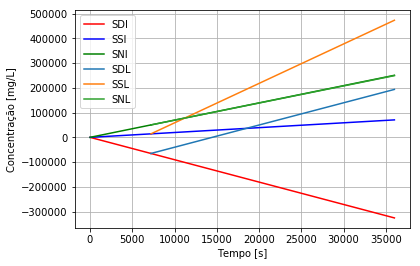

In [5]:
#cinética das diferentes anfetaminas
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
dt=0.1                              #Intervalo de tempo
tempo1=np.arange(0,7200,dt)         #tempo com apenas a droga de ação imediata fazendo efeito
tempo2=np.arange(7200+dt,36000,dt)  #tempo dps q a droga lenta começar a fazer efeito
doseCP = 10   #dose da droga de ação imediata
doseLP = 10   #dose da droga de ação lenta
dose_totbl = doseCP+doseLP
D=dose_totbl  #Concentração inicial no sis digestivo
S=0   #Concentração inicial no sis sanguíneo
N=0   #Concentração inicial no sis nervoso
Z0 = [D,S,N] #condição inicibl
elimDCP = 0.005   #taxa de eliminação da droga imediata no Sis Digestivo
elimDLP = 0.001   #taxa de eliminação da droga lenta no Sis Digestivo
elimSCP = 0.004   #taxa de eliminação da droga imediata no Sis Sanguíneo
elimSLP = 0.005   #taxa de eliminação da droga lenta no Sis Sanguíneo
elimNCP = 0.003   #taxa de eliminação da droga imediata no Sis Nervoso
elimNLP = 0.008   #taxa de eliminação da droga lenta no Sis Nervoso
tad=0.7  #taxa de absorção da parede intestinbl
tas=0.9  #taxa de absorção no sangue para o sistema nervoso
tun=0.99   #taxa de uso nervoso, quanto o sis. nervoso vai utilisar a cada intervblo de tempo

def  estoquesL(Z,t):
	dDdt = - elimDLP * doseLP + doseLP * tas
	dSdt = doseLP * tas - elimSLP*doseLP + doseLP * tad
	dNdt = doseLP * tad - elimNLP * doseLP
	return (dDdt, dSdt, dNdt)



def estoques1C(Z0, t): #antes de duas horas
	dDdt = - elimDCP * doseCP  - doseCP * tas
	dSdt = doseCP * tas - elimSCP*doseCP - doseCP * tad
	dNdt = doseCP * tad - elimNCP * doseCP
	return (dDdt, dSdt, dNdt)

a= odeint(estoques1C, Z0, tempo1)

Z=[a[len(tempo1)-1][0],a[len(tempo1)-1][1],a[len(tempo1)-1][2]]

a0=a[len(tempo1)-1][0]

bl=odeint(estoquesL,Z,tempo2)

def estoques2C(Z,t):
	dDdt = - elimDCP * doseCP - doseCP * tas
	dSdt = doseCP * tas - elimSCP * doseCP - doseCP * tad
	dNdt = doseCP * tad - elimNCP * doseCP
	return (dDdt, dSdt, dNdt)

bc= odeint(estoques2C,Z,tempo2)

plt.plot(tempo1, a[:,0],label="SDI", color='r')
plt.plot(tempo1, a[:,1],label="SSI", color='blue')
plt.plot(tempo1, a[:,2],label="SNI", color='green')
plt.plot(tempo2, bc[:,0], color='r')
plt.plot(tempo2, bc[:,1], color='blue')
plt.plot(tempo2, bc[:,2], color='green')
plt.plot(tempo2, bl[:,0],label="SDL")
plt.plot(tempo2, bl[:,1],label="SSL")
plt.plot(tempo2, bl[:,2],label="SNL")
plt.legend()
plt.grid(True)
plt.xlabel("Tempo [s]")
plt.ylabel("Concentração [mg/L]")
plt.show()

# dois odeints, com as equações de cada intervblo de tempo

